In [9]:
%matplotlib notebook

In [1]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *
import astropy
from astropy import constants as ac
import lightkurve
from scipy.optimize import minimize
from astropy.io import fits
from astropy.table import Table

/Users/lupitatovar/anaconda3/lib/python3.10/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/lupitatovar/.lightkurve/cache. Please move all the files in the legacy directory /Users/lupitatovar/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


### Loading in one text file

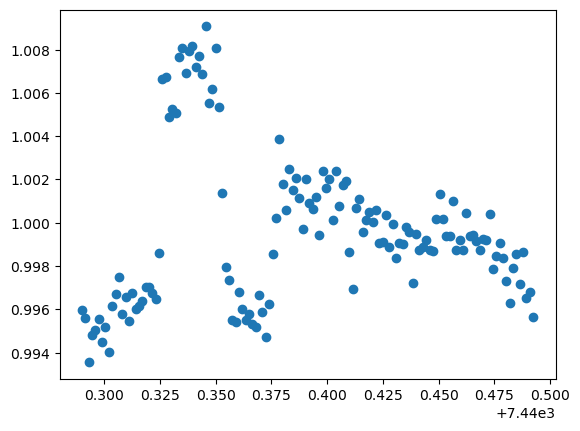

In [2]:
spitzerlc = pd.read_csv('flares_spitzer/phot0001.txt', delim_whitespace=True, names=['Time','Flux','3','4','5','6','7',
                                                                                    '8','9','10','11'])
spitzerlc
plt.scatter(spitzerlc.Time.values,spitzerlc.Flux.values)

In [3]:
import glob

In [4]:
glob.glob('flares_spitzer'+"/*.txt")

['flares_spitzer/phot0030.txt',
 'flares_spitzer/phot0024.txt',
 'flares_spitzer/phot0018.txt',
 'flares_spitzer/phot0144.txt',
 'flares_spitzer/phot0150.txt',
 'flares_spitzer/phot0151.txt',
 'flares_spitzer/phot0145.txt',
 'flares_spitzer/phot0019.txt',
 'flares_spitzer/phot0025.txt',
 'flares_spitzer/phot0031.txt',
 'flares_spitzer/phot0027.txt',
 'flares_spitzer/phot0033.txt',
 'flares_spitzer/phot0153.txt',
 'flares_spitzer/phot0147.txt',
 'flares_spitzer/phot0146.txt',
 'flares_spitzer/phot0152.txt',
 'flares_spitzer/phot0032.txt',
 'flares_spitzer/phot0026.txt',
 'flares_spitzer/phot0022.txt',
 'flares_spitzer/phot0036.txt',
 'flares_spitzer/phot0156.txt',
 'flares_spitzer/phot0142.txt',
 'flares_spitzer/phot0143.txt',
 'flares_spitzer/phot0157.txt',
 'flares_spitzer/phot0037.txt',
 'flares_spitzer/phot0023.txt',
 'flares_spitzer/phot0009.txt',
 'flares_spitzer/phot0035.txt',
 'flares_spitzer/phot0021.txt',
 'flares_spitzer/phot0141.txt',
 'flares_spitzer/phot0155.txt',
 'flares

In [5]:
lc_files = glob.glob('flares_spitzer'+"/*.txt")

for k in range(len(lc_files)): 
    df_tmp = pd.read_csv(lc_files[k], delim_whitespace=True, names=['Time','Flux','3','4','5','6','7',
                                                                                    '8','9','10','11']) 
    print(k, df_tmp.shape) 
    if k==0: 
        df = df_tmp 
    else: 
         df = df.append(df_tmp) 

df = df.sort_values(by='Time')


0 (219, 11)
1 (221, 11)
2 (550, 11)
3 (236, 11)
4 (134, 11)
5 (150, 11)
6 (169, 11)
7 (482, 11)
8 (315, 11)
9 (209, 11)
10 (271, 11)
11 (248, 11)
12 (227, 11)
13 (122, 11)
14 (226, 11)
15 (221, 11)
16 (149, 11)
17 (550, 11)
18 (123, 11)
19 (108, 11)
20 (182, 11)
21 (150, 11)
22 (150, 11)
23 (180, 11)
24 (133, 11)
25 (222, 11)
26 (549, 11)
27 (224, 11)
28 (550, 11)
29 (239, 11)
30 (231, 11)
31 (306, 11)
32 (220, 11)
33 (549, 11)
34 (362, 11)
35 (538, 11)
36 (122, 11)
37 (326, 11)
38 (67, 11)
39 (67, 11)
40 (127, 11)
41 (224, 11)
42 (67, 11)
43 (67, 11)
44 (67, 11)
45 (67, 11)
46 (67, 11)
47 (67, 11)
48 (586, 11)
49 (67, 11)
50 (150, 11)
51 (121, 11)
52 (185, 11)
53 (156, 11)
54 (67, 11)
55 (150, 11)
56 (122, 11)
57 (67, 11)
58 (136, 11)
59 (67, 11)
60 (246, 11)
61 (117, 11)
62 (67, 11)
63 (113, 11)
64 (67, 11)
65 (271, 11)
66 (67, 11)
67 (122, 11)
68 (67, 11)
69 (67, 11)
70 (67, 11)
71 (67, 11)
72 (67, 11)
73 (278, 11)
74 (40, 11)
75 (67, 11)
76 (67, 11)
77 (67, 11)
78 (295, 11)
79 (122

/var/folders/qt/5k94vxpj21j50gmh6vcpwn5h0000gn/T/ipykernel_20928/305983287.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_tmp)
/var/folders/qt/5k94vxpj21j50gmh6vcpwn5h0000gn/T/ipykernel_20928/305983287.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_tmp)
/var/folders/qt/5k94vxpj21j50gmh6vcpwn5h0000gn/T/ipykernel_20928/305983287.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_tmp)
/var/folders/qt/5k94vxpj21j50gmh6vcpwn5h0000gn/T/ipykernel_20928/305983287.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_tmp)
/var/folders/qt/5k94vxpj21j50gmh6vcpwn5h

<IPython.core.display.Javascript object>


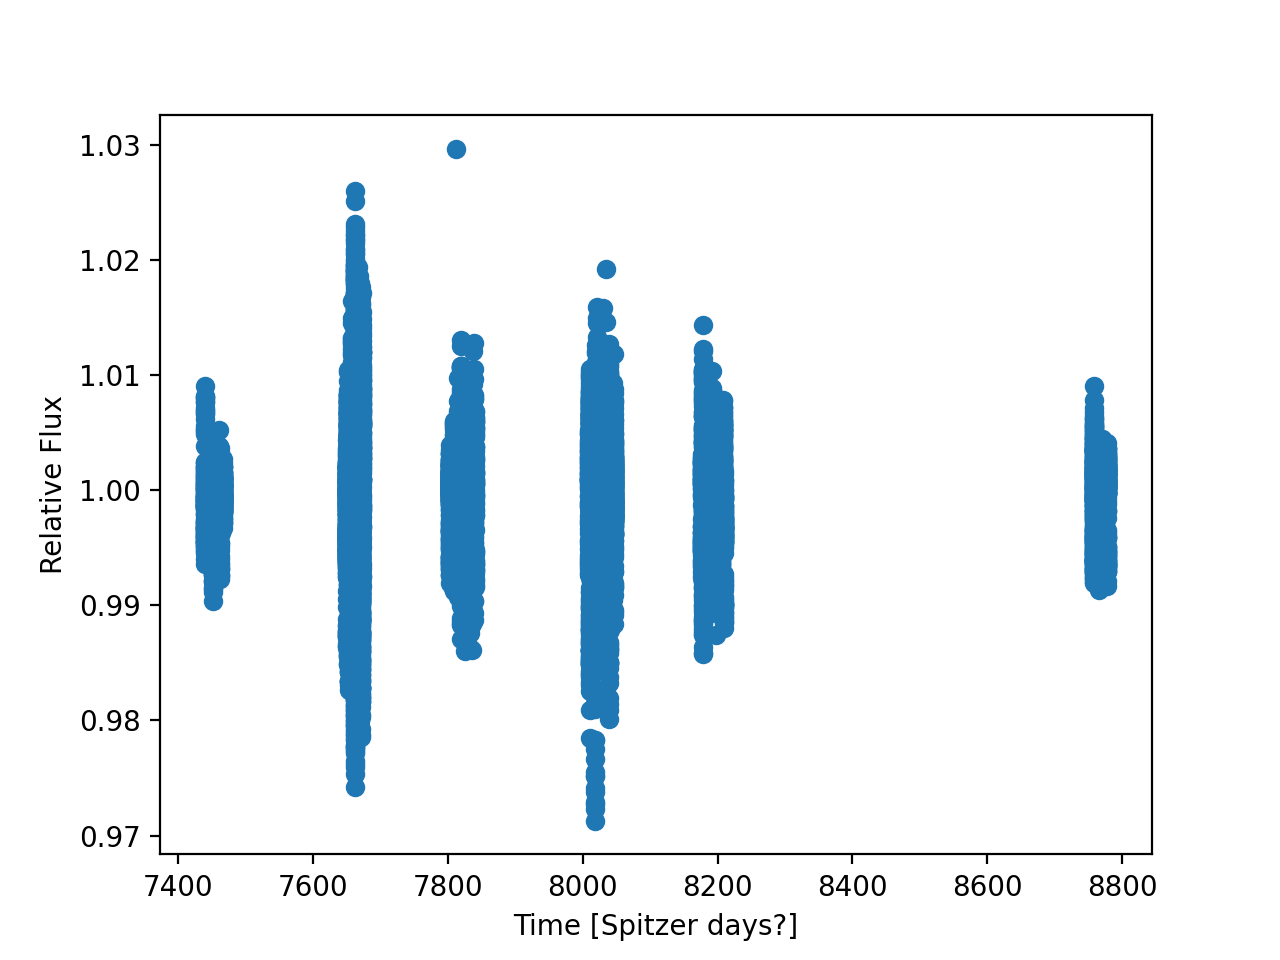

Text(0, 0.5, 'Relative Flux')

In [12]:
plt.scatter(df['Time'].values,df['Flux'].values)
plt.xlabel('Time [Spitzer days?]')
plt.ylabel('Relative Flux')